In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

/Users/masahiro/opt/anaconda3/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
plt.style.use("ggplot")
np.random.seed(123)

In [3]:
NMC = 100
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
r = (xmc ** 2 + ymc ** 2) ** 0.5
accept = np.where(r<=1,1,0)
accept_ratio = np.sum(accept)/NMC
print(accept_ratio)

0.82


In [4]:
NMC = 1000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

@interact(mcs=(0,NMC,1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1,0.001)
    y = (1 - x ** 2) ** 0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x,y,alpha=0.3)
    plt.fill_between(x,y,y2,alpha=0.3)
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs],ymc[:mcs],color="black",marker=".")
    plt.show()
    print("Monte Carlo:",accept_ratio)
    print("Analytical Solution:",np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=1000), Output()), _dom_classes=('widget-intera…

In [5]:
pi_mcs = []

NMC = 10000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

for mcs in range(1,NMC):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1,1,0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [6]:
#横軸の作成
pi_x = np.arange(len(pi_mcs)) + 1

Text(0, 0.5, 'accept ratio')

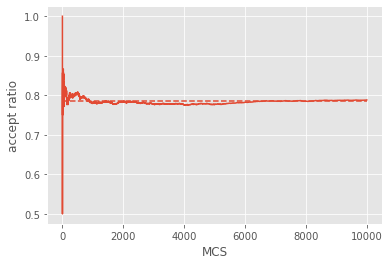

In [7]:
plt.plot(pi_x,pi_mcs)
plt.hlines(0.785,pi_x[0],pi_x[-1],linestyle="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")